<a href="https://colab.research.google.com/github/dnjhaha/AML/blob/master/AMLASSIGN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Danni Jin AML Spring 2020 assignment #2

# Question1:
**Setup First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:**

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

**Warning: fetch_mldata() is deprecated since Scikit-Learn 0.20. You should use fetch_openml() instead. However, it returns the unsorted MNIST dataset, whereas fetch_mldata() returned the dataset sorted by target (the training set and the test test were sorted separately). In general, this is fine, but if you want to get the exact same results as before, you need to sort the dataset using the following function:** 

In [0]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

**Load the Fashion MNIST dataset** 

In [106]:
try:
    from sklearn.datasets import fetch_openml
    #Scikit-Learn provides many helper functions to download popular datasets. Fashion MNIST is one of them.
    mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('Fashion-MNIST')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

**There are 70,000 images, and each image has 784 features.**

In [107]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

**This is because each image is 28×28 pixels,
and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).**

In [108]:
28*28

784

**split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).**

In [0]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

**Train a Random Forest classifier on the dataset , then evaluate the resulting model on the test set.**

In [0]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=10,random_state=42)
#n_estimators:(default=100) The number of trees in the forest.
# random_state:Controls both the randomness of the bootstrapping of the samples used when building trees

**Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
what data we are training on, which is X_train and Y_train.**

In [0]:
import time
t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

**print the time how long the training data takes**

In [112]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 9.40s


**Accuracy classification score.this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_test.**

In [113]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8561

**Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.**

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)#the explained variance:95% is an elbow where it stops growing fast.
X_train_reduced = pca.fit_transform(X_train)

**Train a new Random Forest classifier on the reduced dataset and see how long it takes.**

In [0]:
rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

**after PCA how long the training data takes.**

In [116]:

print("Training took {:.2f}s".format(t1 - t0))

Training took 13.33s


**Training is actually almost twice slower now! dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm.**

**let's check the precision of the new random forest classifier.**

In [117]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8088

**It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance.**

# Question2:
**Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class.
The MNIST dataset was loaded above.
Dimensionality reduction on the full 60,000 images takes a very long time, so let's only do this on a random subset of 10,000 images:**

In [0]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]#Randomly permute a sequence, or return a permuted range.

X = mnist['data'][idx]
y = mnist['target'][idx]


**Now let's use t-SNE to reduce dimensionality down to 2D so we can plot the dataset:**

In [0]:
from sklearn.manifold import TSNE
#t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. 
tsne = TSNE(n_components=2, random_state=42)#n_componentsint,Dimension of the embedded space.
X_reduced = tsne.fit_transform(X)#random_state is the seed used by the random number generator; 


**Now let's use Matplotlib's scatter() function to plot a scatterplot, using a different color for each digit:**

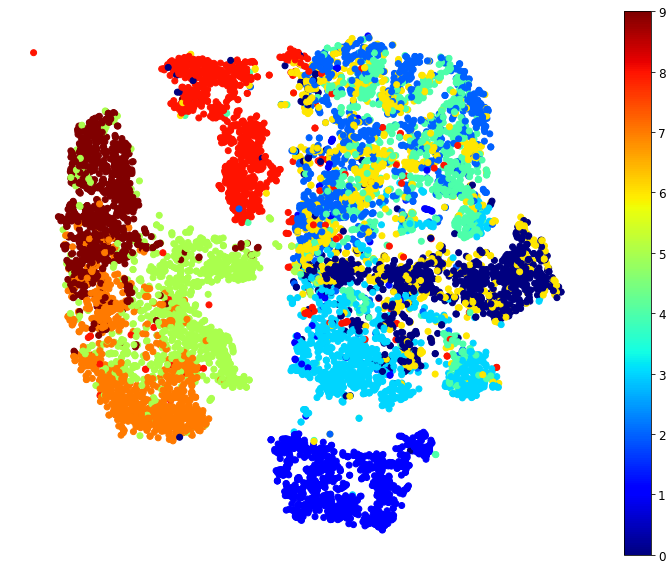

In [120]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")#cmap : Colormap,A Colormap instance or registered name. cmap is only used if c is an array of floats. If None, defaults to rc image.cmap.
#This function takes in 2 variables to plot - while Y is assigning colors to the points based on their true class. 
plt.axis('off')
plt.colorbar()
plt.show()


**This plot tells us which numbers are easily distinguishable from the others (e.g., 1s, 7s are rather well separated clusters), and it also tells us which numbers are often hard to distinguish (e.g., 0s and 2s, 4s and 6s, and so on).
Let's focus on digits 0,2,4 and 6, which seem to overlap a lot.**

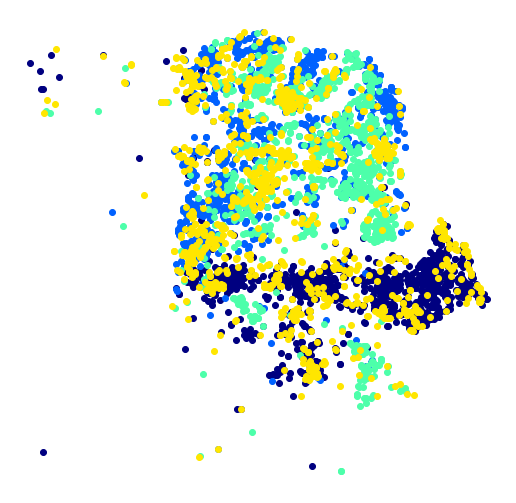

In [121]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (0,2, 4, 6):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

**Let's see if we can produce a nicer image by running t-SNE on these 4 digits:**

In [0]:
idx = (y==0)|(y == 2) | (y == 4) | (y == 6) 
X_subset = X[idx]
y_subset = y[idx]
tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)#Fit X_subset into an embedded space and return that transformed output.

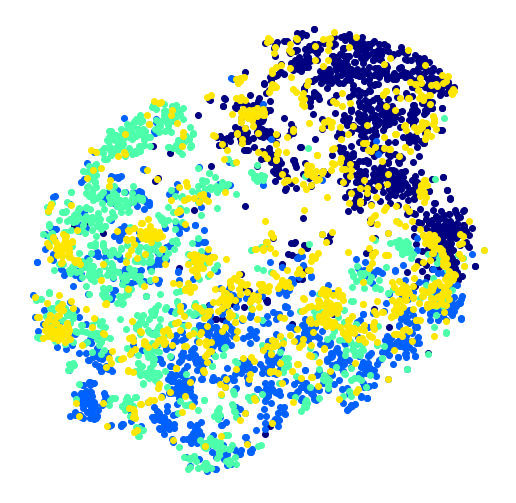

In [124]:
plt.figure(figsize=(9,9))
for digit in (0,2, 4, 6):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

Much better, now the clusters have far less overlap. But they are all over the place. It would be nice if we could visualize a few digits from each cluster, to understand why this is the case. Let's do that now.

Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits.

Let's create a plot_digits() function that will draw a scatterplot (similar to the above scatterplots) plus write colored digits, with a minimum distance guaranteed between these digits. If the digit images are provided, they are plotted instead. This implementation was inspired from one of Scikit-Learn's excellent examples (plot_lle_digits, based on a different digit dataset).

In [0]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

**First let's just write colored digits:**

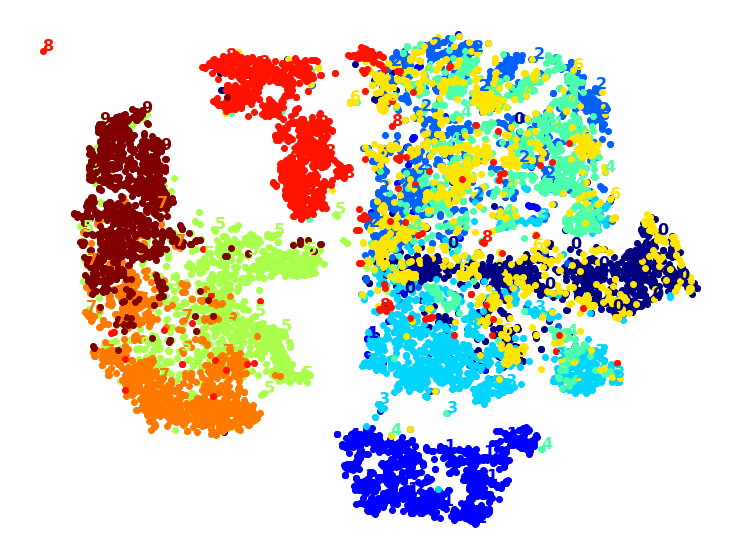

In [126]:

plot_digits(X_reduced, y)

**Well that's okay, but not that beautiful. Let's try with the images:**

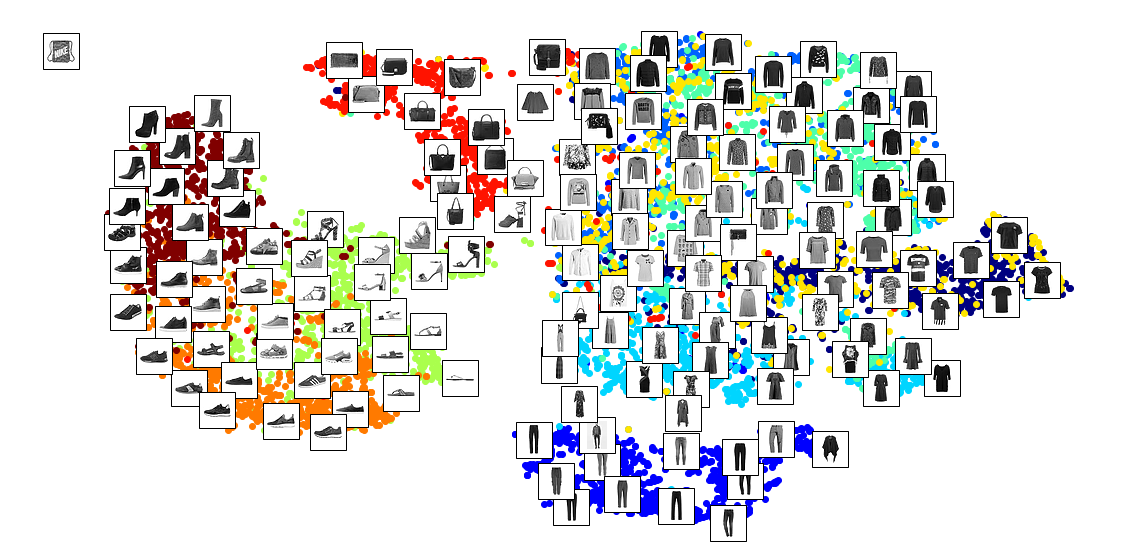

In [127]:

plot_digits(X_reduced, y, images=X, figsize=(20, 10))

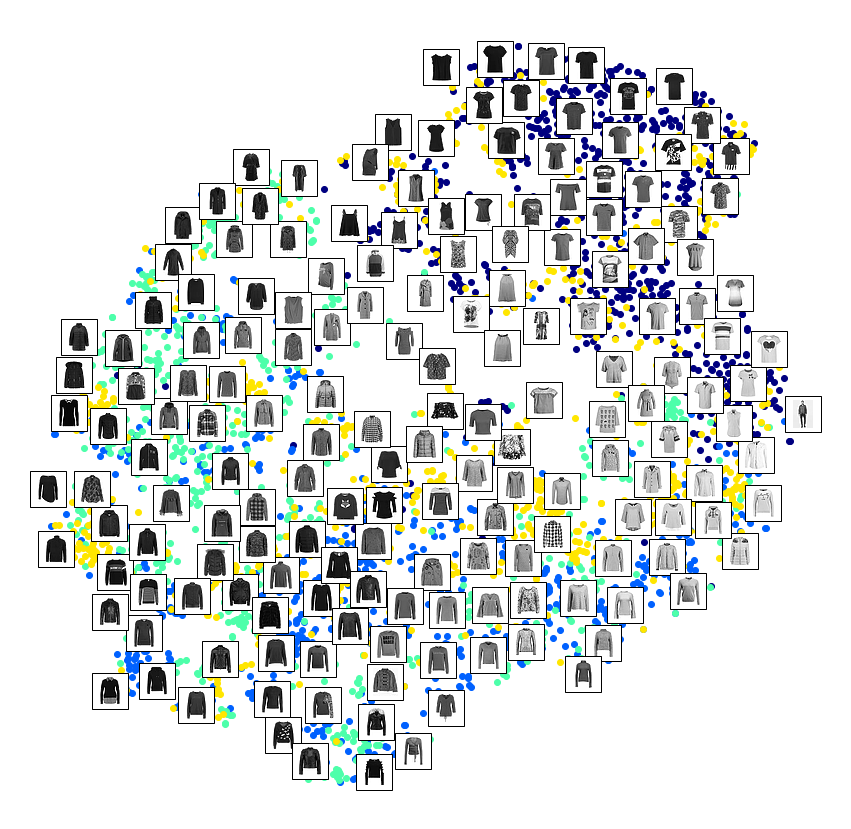

In [128]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(15, 15))

Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

Let's start with PCA. We will also time how long it takes:

PCA took 0.5s.


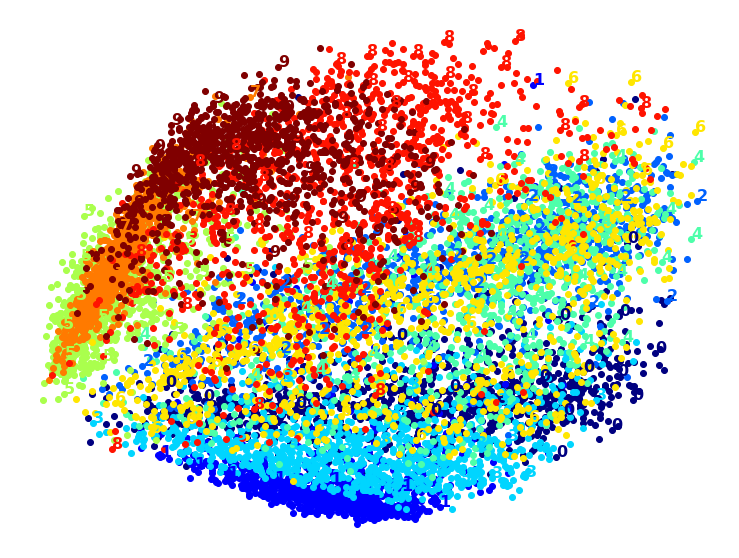

In [129]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

**PCA is blazingly fast! But although we do see a few clusters, there's way too much overlap. Let's try LLE:**

LLE took 183.7s.


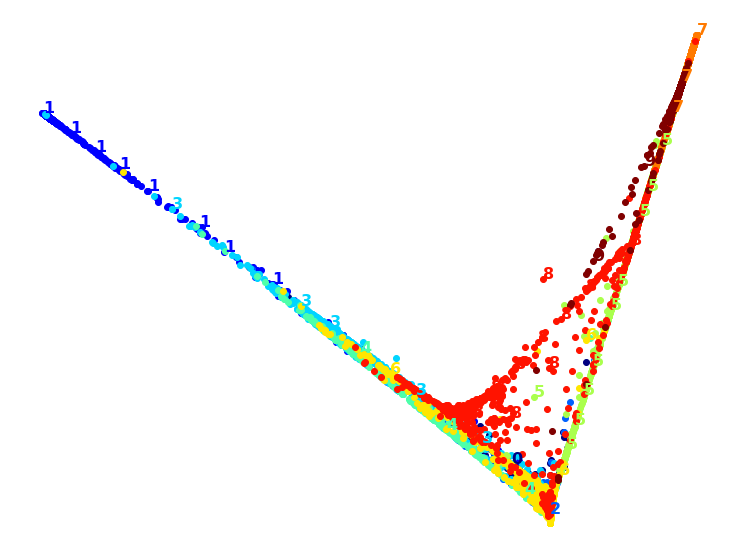

In [130]:

from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()


**That took a while, and the result does not look too good. Let's see what happens if we apply PCA first, preserving 95% of the variance:**

PCA+LLE took 18.6s.


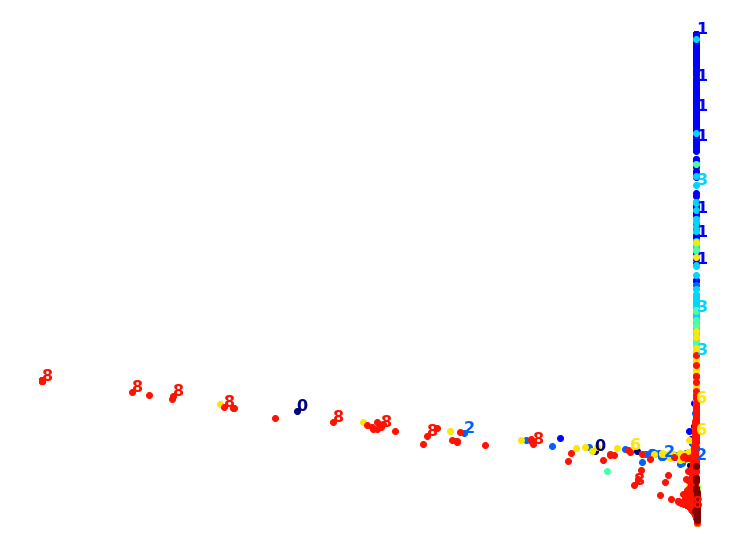

In [131]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()


The result is more or less the same, but this time it was almost 4× faster.
Let's try MDS. It's much too long if we run it on 10,000 instances, so let's just try 2,000 for now:

MDS took 112.2s (on just 2,000 MNIST images instead of 10,000).


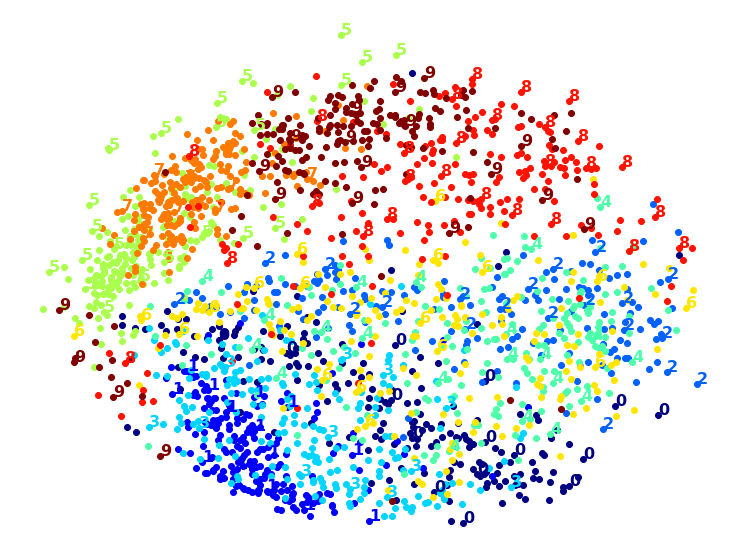

In [132]:
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()


**This does not look great, all clusters overlap too much. Let's try with PCA first, perhaps it will be faster?**

PCA+MDS took 118.0s (on 2,000 MNIST images).


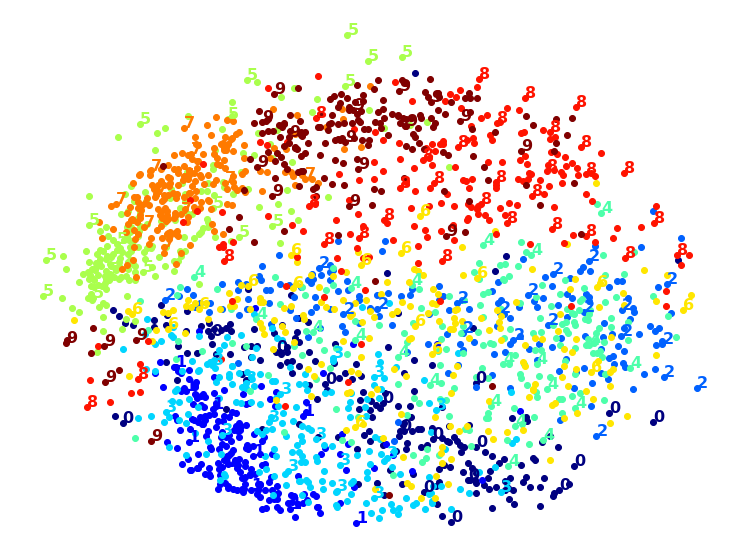

In [133]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()


**Same result, and no speedup: PCA did not help (or hurt).
Let's try LDA:**

LDA took 3.0s.


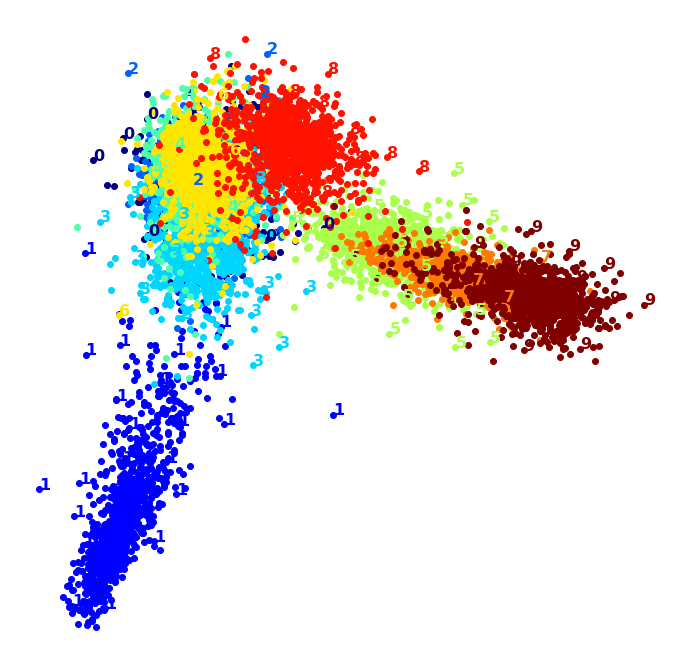

In [134]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

**This one is very fast, and it looks nice at first, until you realize that several clusters overlap severely.
Well, it's pretty clear that t-SNE won this little competition, wouldn't you agree? We did not time it, so let's do that now:**

t-SNE took 276.2s.


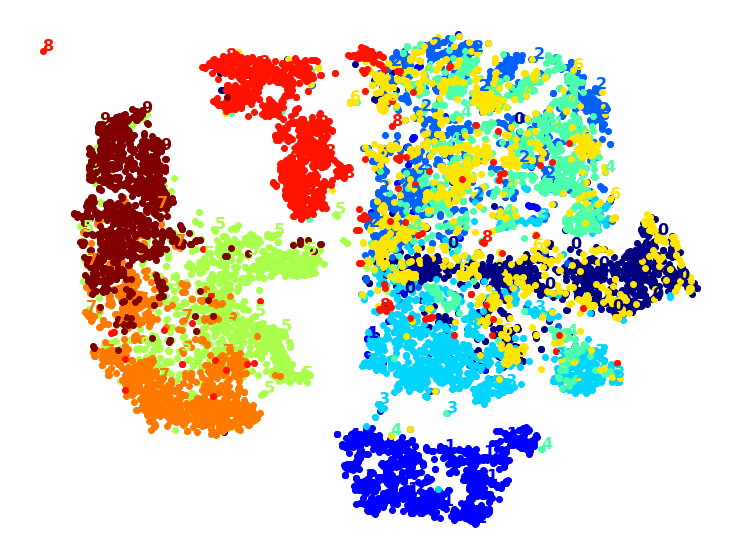

In [135]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

**It's twice slower than LLE, but still much faster than MDS, and the result looks great. Let's see if a bit of PCA can speed it up:**

PCA+t-SNE took 107.3s.


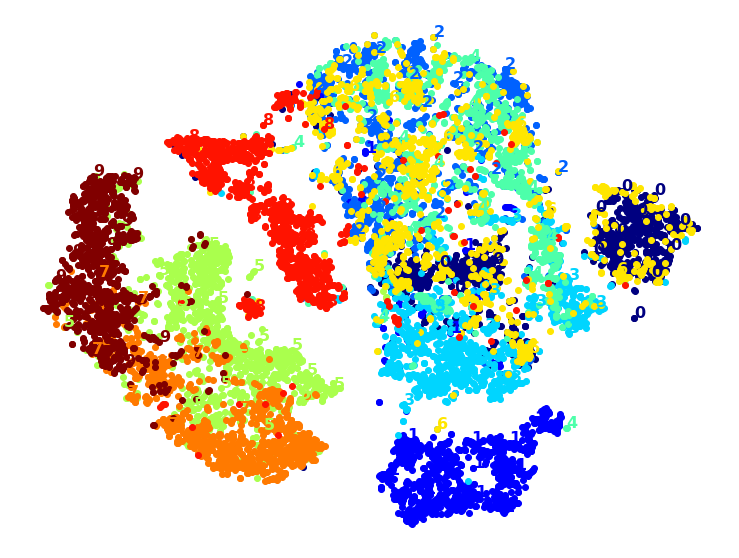

In [136]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

# PCA  gave us a speedup, without damaging the result. 